In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# df = pd.read_csv('working_raw_data.csv')
df = pd.read_excel('data/get_me_working_Demogs_FS01-US16_all.xlsx')

In [9]:
df.columns

Index(['placeholderID', 'Gender', 'Ethnicity', 'citizenship', 'First Gen',
       'Pell eligible', 'permanent ZIP', 'Entering term code',
       'Entering Term Major code', 'Entering Term Major Name',
       'last enrolled term', 'Last enrolled major code',
       'Last enrolled major name', 'grad term', 'grad major code',
       'grad major name', 'other awards', 'ACT_ENGL', 'ACT_MATH', 'ACT_READ',
       'ACT_SCI', 'ACT_COMP', 'ACT_EW', 'ap66 calculus AB', 'ap68 calculus BC',
       'ap69 Calculus AB Subscore Grade', 'ap78 physics B',
       'ap80 physics C Mech', 'ap82 physics C Physics C Electricity & Magnet',
       'ap83 physics 1', 'ap84 physics 2', 'Entering Term Major name',
       'Entering_term_major_type', 'Last_enrolled_major_type',
       'grad_major_type'],
      dtype='object')

In [10]:
df.placeholderID.unique().size

158134

In [12]:
df.head()

,placeholderID,Gender,Ethnicity,citizenship,First Gen,Pell eligible,permanent ZIP,Entering term code,Entering Term Major code,Entering Term Major Name,...,ap69 Calculus AB Subscore Grade,ap78 physics B,ap80 physics C Mech,ap82 physics C Physics C Electricity & Magnet,ap83 physics 1,ap84 physics 2,Entering Term Major name,Entering_term_major_type,Last_enrolled_major_type,grad_major_type
0,97758DD4-7286-4A19-BA6C-00005FE6CFA3,M,White (non-Hispanic),US Citizen,N,N,49504,FS98,3784.0,Biological Science Interdept,...,NaN,NaN,NaN,NaN,NaN,NaN,Biological Science Interdept,Other STEM,NaN,NaN
1,592FB87B-B37F-476D-B7F0-0001F057D6A6,F,White (non-Hispanic),US Citizen,N,N,22309,FS99,843.0,Music Therapy,...,NaN,NaN,NaN,NaN,NaN,NaN,Music Therapy,non STEM,NaN,NaN
2,9C41EAAC-FC57-42F9-B53F-000201BE35C3,M,White (non-Hispanic),US Citizen,N,N,48879,FS05,1069.0,General Business Admin Prelaw,...,NaN,NaN,NaN,NaN,NaN,NaN,General Business Admin Prelaw,non STEM,NaN,NaN
3,7AED7EC2-ED7F-4FE1-8270-000209CBA389,M,White (non-Hispanic),US Citizen,N,Y,49341,FS05,5151.0,No Preference,...,NaN,NaN,NaN,NaN,NaN,NaN,No Preference,No Preference,NaN,NaN
4,3C1C5E03-FA14-4F6A-B0C6-000250988C23,M,White (non-Hispanic),US Citizen,N,N,48154,FS11,2371.0,Engineering No Preference,...,NaN,NaN,NaN,NaN,NaN,NaN,Engineering No Preference,Engineering,NaN,NaN


In [13]:
# df2 = df.groupby(['Ethnicity', 'Graduating Major Category'])['Ethnicity'].count().unstack('Ethnicity').fillna(0)
df2 = df.groupby(['Ethnicity', 'grad_major_type'])['Ethnicity'].count().unstack('Ethnicity').fillna(0)
df2['Asian / Pacific Islander'] = df2['Asian (non-Hispanic)'] + df2['Asian / Pacific Islander'] + df2['Hawaiian / Pacific Islander (non-Hispanic)']
del df2['Asian (non-Hispanic)'] , df2['Asian / Pacific Islander'] , df2['Hawaiian / Pacific Islander (non-Hispanic)']
df2['No Data'] = df2['Not Reported'] + df2['Not Requested']
del df2['Not Reported'], df2['Not Requested']
df2['maximum'] = df2.transpose().sum()
df3 = df2.div(df2['maximum'].values, axis=0)
df2

Ethnicity,American Indian/Alaskan Native (non-Hispanic),Black or African American (non-Hispanic),Hispanic Ethnicity,International,Two or more races (non-Hispanic),White (non-Hispanic),No Data,maximum
grad_major_type,,,,,,,,
Education,9.0,68.0,40.0,7.0,23.0,1549.0,12.0,1708.0
Engineering,16.0,197.0,83.0,289.0,42.0,3271.0,32.0,3930.0
Lyman Briggs,2.0,9.0,9.0,4.0,6.0,457.0,1.0,488.0
Other STEM,91.0,1220.0,539.0,1137.0,264.0,17097.0,233.0,20581.0
Physics/Astrophysics,1.0,5.0,11.0,14.0,0.0,226.0,2.0,259.0
non STEM,73.0,1472.0,615.0,1296.0,240.0,14641.0,205.0,18542.0


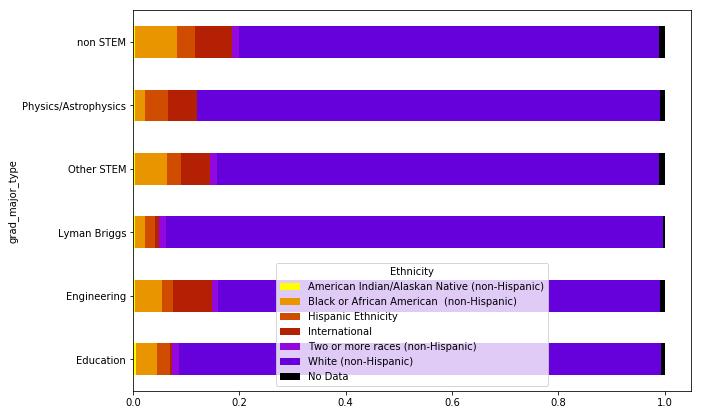

In [14]:
fig, ax = plt.subplots(1, figsize=(10,7))

df3[['American Indian/Alaskan Native (non-Hispanic)',
       'Black or African American  (non-Hispanic)', 'Hispanic Ethnicity',
       'International', 'Two or more races (non-Hispanic)',
       'White (non-Hispanic)', 'No Data',]].plot(kind='barh', stacked=True, ax=ax, colormap='gnuplot_r')

In [15]:
df2 = df[df['Physics major at one time']=='Y'].groupby(['Ethnicity', 'Graduating Major Category'])['Ethnicity'].count().unstack('Ethnicity').fillna(0)
df2['Asian / Pacific Islander'] = df2['Asian (non-Hispanic)'] + df2['Asian / Pacific Islander'] + df2['Hawaiian / Pacific Islander (non-Hispanic)']
del df2['Asian (non-Hispanic)'] , df2['Asian / Pacific Islander'] , df2['Hawaiian / Pacific Islander (non-Hispanic)']
df2['No Data'] = df2['Not Reported']# + df2['Not Requested']
del df2['Not Reported']#, df2['Not Requested']
df2['maximum'] = df2.transpose().sum()
df3 = df2.div(df2['maximum'].values, axis=0)
df2

KeyError: 'Physics major at one time'

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,7))

df3[['American Indian/Alaskan Native (non-Hispanic)',
       'Black or African American  (non-Hispanic)', 'Hispanic Ethnicity',
       'International', 'Two or more races (non-Hispanic)',
       'White (non-Hispanic)', 'No Data',]].plot(kind='barh', stacked=True, ax=ax, colormap='gnuplot_r')

ax.text(s='Physics major at one point', x=0.1, y=3.5, fontsize=15)

In [19]:
df2 = df.groupby(['Gender', 'grad_major_type'])['Gender'].count().unstack('Gender').fillna(0)
df2['maximum'] = df2.transpose().sum()
df3 = df2.div(df2['maximum'].values, axis=0)
df2

Gender,F,M,maximum
grad_major_type,,,
Education,1588,158,1746
Engineering,957,3244,4201
Lyman Briggs,306,227,533
Other STEM,12432,9306,21738
Physics/Astrophysics,43,225,268
non STEM,10346,9033,19379


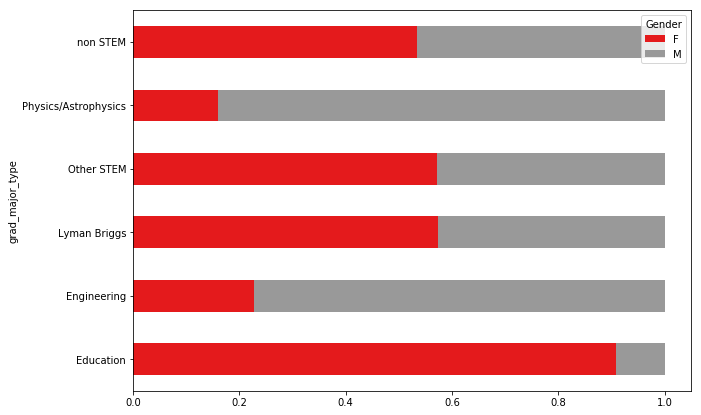

In [20]:
fig, ax = plt.subplots(1, figsize=(10,7))

df3[['F', 'M']].plot(kind='barh', stacked=True, ax=ax, colormap='Set1')

# ax.text(s='Physics major at one point', x=0.1, y=3.5, fontsize=15)

In [ ]:
df2 = df[df['Physics major at one time']=='Y'].groupby(['gndr_flag', 'Graduating Major Category'])['gndr_flag'].count().unstack('gndr_flag').fillna(0)
df2['maximum'] = df2.transpose().sum()
df3 = df2.div(df2['maximum'].values, axis=0)
df2
fig, ax = plt.subplots(1, figsize=(10,7))

df3[['F', 'M']].plot(kind='barh', stacked=True, ax=ax, colormap='Set1')

ax.text(s='Physics major at one point', x=0.1, y=3.5, fontsize=15)